<img src="https://raw.githubusercontent.com/Qiskit/qiskit-tutorials/master/images/qiskit-heading.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

In [5]:
# install dependencies (Qiskit)
!pip install --upgrade qiskit==0.19.6 
!pip install --upgrade metakernel
!pip install --upgrade portalocker
!pip install --upgrade matplotlib
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

Requirement already up-to-date: qiskit==0.19.6 in /usr/local/lib/python3.6/dist-packages (0.19.6)
Requirement already up-to-date: metakernel in /usr/local/lib/python3.6/dist-packages (0.24.4)
Requirement already up-to-date: portalocker in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.3.1)
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-23of5c78
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-23of5c78
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-cp36-none-any.whl size=16672 sha256=9b279a09ef2bacc3b0a438dda04ee149d2679a934832266e595ebf37d69a94eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-fxe5e69v/wheels/0c/57/26/1c12886a219af04a38ca1e674fdeeff40b8a5963326ba3c71a
Successfully built qiskit-textbook


## _*疊加*_ 


可在https://github.com/qiskit/qiskit-tutorial 上獲得此筆記本的最新版本。


***
### 貢獻者
Jay Gambetta, Antonio Córcoles, Andrew Cross, Anna Phan

### Qiskit軟件包版本

In [1]:
import qiskit
version_info = qiskit.__qiskit_version__
print("You are now running Qiskit with the following version numbers")
print(version_info)

You are now running Qiskit with the following version numbers
{'qiskit-terra': '0.14.2', 'qiskit-aer': '0.5.2', 'qiskit-ignis': '0.3.3', 'qiskit-ibmq-provider': '0.7.2', 'qiskit-aqua': '0.7.3', 'qiskit': '0.19.6'}


## 介紹

許多人傾向於認為量子物理學是很難的數學，但這實際上並非如此。 量子概念與線性代數課程中的概念非常相似，您可能在大學甚至是高中時就讀過。 量子物理學的挑戰是必須接受它是違反直覺的思想，而且缺乏簡單的基礎理論。 我們相信，如果您掌握以下兩個原則，您將有一個良好的開端：
1. 當物理系統處於確定狀態時，它仍然有隨機的行為。
2. 彼此相距非常遠而無法相互影響的兩個系統，儘管各自隨機，但它們之間的聯繫仍可能緊密相關。

在本教程中，我們將討論這些原則中的第一個，在[此其他教程](entanglement_introduction.ipynb)中將討論第二個。

In [2]:
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit import BasicAer, IBMQ

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [3]:
backend = BasicAer.get_backend('qasm_simulator') # run on local simulator by default

# Uncomment the following lines to run on a real device
#IBMQ.load_accounts()
#from qiskit.providers.ibmq import least_busy
#backend = least_busy(IBMQ.backends(operational=True, simulator=False))
#print("the best backend is " + backend.name())

## 量子態-基本態和疊加<a id='section1'></a>

上面的第一個原理告訴我們，在根據所使用的基礎向量，測量量子態的結果可能是隨機的，也可能是確定的。 為了演示，我們將首先介紹一個量子位的計算（或標準）基礎向量。

計算基礎向量是包含基本態和激發態 $\{|0\rangle,|1\rangle\} $的集合，該集合也對應於以下向量：

$$|0\rangle =\begin{pmatrix} 1 \\ 0 \end{pmatrix}$$
$$|1\rangle =\begin{pmatrix} 0 \\ 1 \end{pmatrix}$$

在Python中，這些表示為

In [4]:
zero = np.array([[1],[0]])
one = np.array([[0],[1]])

在我們的量子處理器系統（以及許多其他物理量子處理器）中，所有量子位自然都以 $ | 0 \rangle $狀態（稱為基態）開始。 為了使 $| 1 \rangle $（或激發）狀態，我們使用運算符
 
$$ X =\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}.$$

該 $X$ 運算符通常稱為位翻轉運算符，因為它完全實現以下功能：

$$X: |0\rangle  \rightarrow  |1\rangle$$
$$X: |1\rangle \rightarrow |0\rangle.$$

在Python中，這可以通過以下方式表示：

In [5]:
X = np.array([[0,1],[1,0]])
print(np.dot(X,zero))
print(np.dot(X,one))

[[0]
 [1]]
[[1]
 [0]]


接下來，我們給出兩個量子電路，用於使用Qiskit製備和測量基本態和激發態的單個量子位。

In [7]:
# Creating registers
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

# Quantum circuit ground 
qc_ground = QuantumCircuit(qr, cr)
qc_ground.measure(qr[0], cr[0])

# Quantum circuit excited 
qc_excited = QuantumCircuit(qr, cr)
qc_excited.x(qr)
qc_excited.measure(qr[0], cr[0])

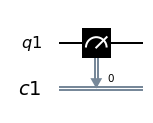

In [8]:
qc_ground.draw(output='mpl')

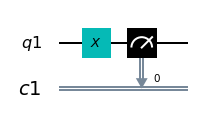

In [9]:
qc_excited.draw(output='mpl')

在這裡，我們創建了兩個具有不同量子電路的工作。 第一個準備基本態，第二個準備激發態。 現在我們可以運行準備好的作業。

In [10]:
circuits = [qc_ground, qc_excited]
job = execute(circuits, backend)
result = job.result()

運行完成後，可以從API輸出中提取數據並進行繪製。

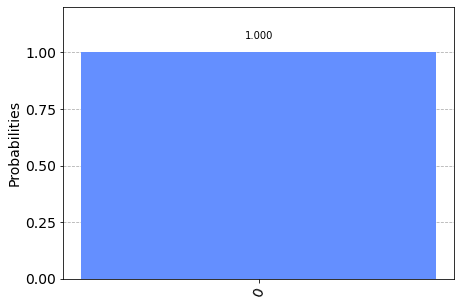

In [11]:
plot_histogram(result.get_counts(qc_ground))

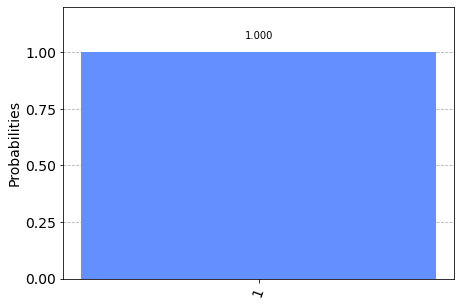

In [12]:
plot_histogram(result.get_counts(qc_excited))

在這裡，我們看到第一個電路的qubit處於 $| 0 \rangle $狀態，第二個電路處於100％概率處於 $|1 \rangle $狀態。如果我們在量子處理器上而不是模擬器上運行，則由於測量誤差，製備誤差和門誤差（對於$| 1 \rangle $狀態）的組合，將與理想的完美答案有所不同。

到目前為止，與經典系統沒有什麼不同。要超越，我們必須探索進行疊加意味著什麼。用量子電路語言生成疊加的操作是Hadamard門 $H$。現在讓我們假設，這扇門就像擲一個公平的硬幣。翻轉的結果有兩個可能的結果，正面或反面，每個均以相同的概率發生。如果我們多次重複這個簡單的思維實驗，我們期望平均而言，我們測量到的腦袋和尾巴一樣多。讓頭為$ | 0 \rangle $，尾為$ | 1 \rangle $。

讓我們運行該實驗的量子版本。首先，我們準備基態$ | 0 \rangle $中的量子位。然後，我們應用Hadamard門（硬幣翻轉）。最後，我們測量量子位的狀態。重複實驗1024次（快照）。如您所料，結果的一半將處於$ | 0 \rangle $狀態，一半的結果將處於$ | 1 \rangle $狀態。

請嘗試以下程序。

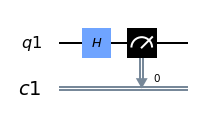

In [17]:
# Quantum circuit superposition 
qc_superposition = QuantumCircuit(qr, cr)
qc_superposition.h(qr)
qc_superposition.measure(qr[0], cr[0])

qc_superposition.draw(output='mpl')

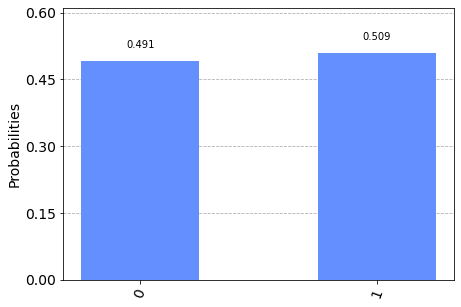

In [14]:
job = execute(qc_superposition, backend, shots = 1024)
result = job.result()

plot_histogram(result.get_counts(qc_superposition))

實際上，就像硬幣翻轉一樣，結果接近50/50，並且由於錯誤（同樣由於狀態準備，測量和門錯誤）而有些不理想。 到目前為止，這仍然不是意外的。 讓我們再次運行實驗，但是這次連續有兩個$H$門。 如果我們認為$H$門類似於硬幣翻轉，那麼我們將其翻轉兩次，並且仍然期望50/50的分配。

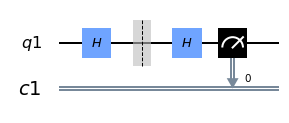

In [18]:
# Quantum circuit two Hadamards 
qc_twohadamard = QuantumCircuit(qr, cr)
qc_twohadamard.h(qr)
qc_twohadamard.barrier()
qc_twohadamard.h(qr)
qc_twohadamard.measure(qr[0], cr[0])

qc_twohadamard.draw(output='mpl')

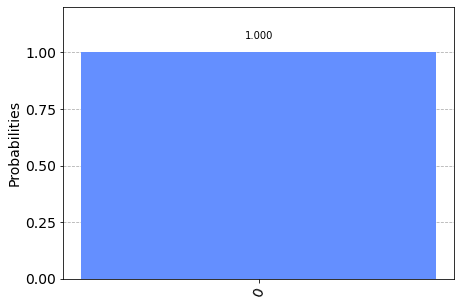

In [19]:
job = execute(qc_twohadamard, backend)
result = job.result()

plot_histogram(result.get_counts(qc_twohadamard))

這次，結果令人驚訝。與經典情況不同，結果很有可能不是隨機的，而是處於$ | 0 \rangle $狀態。 *量子隨機性*不僅僅像經典的隨機硬幣翻轉一樣。在以上兩個實驗中，系統（無噪聲）都處於確定的狀態，但是只有在第一種情況下，它的行為才是隨機的。這是因為，在第一種情況下，通過$ H $門，我們對基態和激發態$（| 0 \rangle + | 1 \rangle）/ \sqrt {2} $ 進行均勻疊加，但是隨後遵循在計算基礎上進行測量。在計算基礎上的測量行為以相等的概率（由於疊加的均勻性）迫使系統處於$ | 0 \rangle $狀態或$ | 1 \rangle $狀態。在第二種情況下，我們可以認為第二個$H$門是最終測量操作的一部分；它將測量基礎從計算基礎更改為“疊加”基礎。以下等式說明了$H$門對計算基礎狀態的作用：
$$ H：| 0 \rangle \rightarrow | + \rangle = \frac{| 0 \rangle + | 1 \rangle} {\sqrt {2}} $$
$$ H：| 1 \rangle \rightarrow |-\rangle = \frac{| 0 \rangle- | 1 \rangle} {\sqrt {2}} .. $$

我們可以將這個新的轉換後的基礎（即疊加基礎）重新定義為集合{$ | + \rangle $，$ |-\rangle $}。現在，我們有另一種方式查看上面的第二個實驗。第一個$ H $門使系統進入疊加狀態，即$ | + \rangle $狀態。第二個$H$門和隨後的標準測量將其變為疊加測量。如果測量結果為0，我們可以得出結論，系統在第二個$H$門之前處於$ | + \rangle $狀態，並且如果獲得1，則意味著系統處於$ |-\rangle $狀態。在上面的實驗中，我們看到結果主要為0，這表明我們的系統在第二個$H$門之前處於$ | + \rangle $疊加狀態。


如果我們通過以下方式表示量子疊加態$ | + \rangle $和$ |-\rangle $，則可以最好地理解數學。

$$ | + \rangle = \frac{1} {\sqrt {2}} \begin{pmatrix} 1 \\ 1 \end {pmatrix} $$

$$ |-\rangle = \frac {1} {\sqrt {2}} \begin {pmatrix} 1 \\ -1 \end {pmatrix} $$

在量子力學中稱為投射或馮·諾依曼測量的標準測量採用量子位的任何疊加狀態，並將其投影到狀態$ | 0 \rangle $或狀態$ | 1 \rangle $，其概率由下式確定： ：

$$ P（i | \psi）= | \langle i | \psi \rangle | ^ 2 $$

其中$ P（i | \psi）$是在給定準備$ \psi $的情況下在狀態$i$中測量系統的概率。

我們已經編寫了Python函數```state_overlap```以返回此代碼：

In [20]:
state_overlap = lambda state1, state2: np.absolute(np.dot(state1.conj().T,state2))**2

現在，我們有了從狀態到標準度量的概率分佈的簡單方法，我們可以回到由Hadamard門進行疊加的情況。 Hadamard門由矩陣定義：

$$ H = \frac {1} {\sqrt {2}} \begin {pmatrix} 1＆1 \\ 1＆-1 \end {pmatrix} $$

作用於狀態$ | 0 \rangle $的$H$門給出：

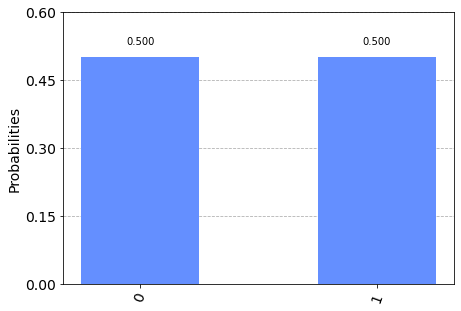

In [21]:
Hadamard = np.array([[1,1],[1,-1]],dtype=complex)/np.sqrt(2)
psi1 = np.dot(Hadamard,zero)
P0 = state_overlap(zero,psi1)
P1 = state_overlap(one,psi1)
plot_histogram({'0' : P0.item(0), '1' : P1.item(0)})

這是第一個疊加實驗的理想版本。

第二個實驗涉及兩次應用Hadamard門。 雖然矩陣乘法表明兩個Hadamards的乘積是恆等運算符（意味著狀態$ | 0 \rangle $保持不變），但在這裡（如前所述），我們更傾向於將其解釋為以疊加為基礎進行測量。 使用以上定義，您可以證明$ H $將計算基礎轉換為疊加基礎。

In [22]:
print(np.dot(Hadamard,zero))
print(np.dot(Hadamard,one))

[[0.70710678+0.j]
 [0.70710678+0.j]]
[[ 0.70710678+0.j]
 [-0.70710678+0.j]]


This is just the beginning of how a quantum state differs from a classical state. Please continue to [Amplitude and Phase](amplitude_and_phase.ipynb) to explore further!